In [245]:
import pandas as pd
from abilities import list_of_abilities
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)

In [246]:
df = pd.read_csv('../pokemony.csv')
df.isnull().sum()

Unnamed: 0            0
Name                  0
Category              0
Generation            0
Types                 0
Abilities             0
Catch_Rate            0
Egg_Groups            0
Hatch_Time            0
Height                0
Weight                0
Exp_Yield             0
Level_Rate            0
Evs                   0
Base_Friendship       0
Evolution_info        0
Male_Ratio            0
Female_Ratio          0
Locations             0
Stats                 0
Type_effectiveness    0
Moves                 0
dtype: int64

In [247]:
df['Evs'].apply(lambda x: len(x))

0       83
1       83
2       83
3       83
4       83
        ..
1020    83
1021    83
1022    83
1023    83
1024    83
Name: Evs, Length: 1025, dtype: int64

In [248]:
df['Male_Ratio'] = df["Male_Ratio"].fillna("Gender unknown")
df['Female_Ratio'] = df["Female_Ratio"].fillna("Gender unknown")

In [249]:
df.isna().sum()

Unnamed: 0            0
Name                  0
Category              0
Generation            0
Types                 0
Abilities             0
Catch_Rate            0
Egg_Groups            0
Hatch_Time            0
Height                0
Weight                0
Exp_Yield             0
Level_Rate            0
Evs                   0
Base_Friendship       0
Evolution_info        0
Male_Ratio            0
Female_Ratio          0
Locations             0
Stats                 0
Type_effectiveness    0
Moves                 0
dtype: int64

In [250]:
print(df['Stats'])

0       HP:\n45???Attack:\n49???Defense:\n49???Sp. Atk...
1       HP:\n60???Attack:\n62???Defense:\n63???Sp. Atk...
2       HP:\n80???Attack:\n82???Defense:\n83???Sp. Atk...
3       HP:\n39???Attack:\n52???Defense:\n43???Sp. Atk...
4       HP:\n58???Attack:\n64???Defense:\n58???Sp. Atk...
                              ...                        
1020    HP:\n125???Attack:\n73???Defense:\n91???Sp. At...
1021    HP:\n90???Attack:\n120???Defense:\n80???Sp. At...
1022    HP:\n90???Attack:\n72???Defense:\n100???Sp. At...
1023    HP:\n90???Attack:\n65???Defense:\n85???Sp. Atk...
1024    HP:\n88???Attack:\n88???Defense:\n160???Sp. At...
Name: Stats, Length: 1025, dtype: object


In [251]:
df['Unnamed: 0'] = df['Unnamed: 0'].apply(lambda x: x+1)

In [252]:
df.rename(columns={'Unnamed: 0': 'Pokedex number'}, inplace=True)

In [253]:
def remove_punc(x):
    punct = ' .,'
    for i in punct:
        x = x.replace(i, '')
    return x

In [254]:
df['Gen'] = df['Generation'].apply(lambda x: remove_punc(x.split('Generation')[1][:4]))

In [255]:
df.loc[809:904, 'Gen'] = 'VIII' #Changing gen of these pokemons since above line doesn't work for generation VIII

In [256]:
def extract_abilities(x):
    current_pokemon_abilities = []
    for ability in list_of_abilities:
        if ability in x:
            current_pokemon_abilities.append(ability)
    return current_pokemon_abilities

In [257]:
df['Abilities'] = df['Abilities'].apply(extract_abilities)

In [258]:
df['Catch_Rate'][0].split()
df['Catch_Rate_Percentage'] = df['Catch_Rate'].apply(lambda x : x.split()[1].replace('(', '').replace(')', ''))

In [259]:
df['Catch_Rate'] = df['Catch_Rate'].apply(lambda x: x.split()[0])

In [260]:
list_of_egg_groups = [
    'Monster',
    'Human-Like',
    'Water 1',
    'Water 2',
    'Water 3',
    'Bug',
    'Mineral',
    'Flying',
    'Amorphous',
    'Field',
    'Fairy',
    'Ditto',
    'Grass',
    'Dragon',
    'No Eggs Discovered'
    ]


In [261]:
def extract_egg_groups(x):
    current_pokemon_egs = []
    for eg in list_of_egg_groups:
        if eg in x:
            current_pokemon_egs.append(eg)
    return current_pokemon_egs

In [262]:
df['Egg_Groups'] = df['Egg_Groups'].apply(extract_egg_groups)

In [263]:
df['Hatch_Time'] = df['Hatch_Time'].apply(lambda x: x.split()[0])

<img src="../images/corrupted_columns.png" alt="drawing" width="800"/>

In [264]:
#checking if weight columns is not corrupted
for i in df['Weight'].unique():
    if 'kg' not in i:
        print('x')

In [265]:
df['Height'] = df['Height'].apply(lambda x: x.split('\t')[1].split()[0])

In [266]:
df['Weight'] = df['Weight'].apply(lambda x: x.split()[0])

In [267]:
df.rename(columns={"Hatch_Time": "Hatch Time (Cycles)", "Height": "Height (m)", "Weight" : "Weight (kg)"}, inplace=True)

In [268]:
df['Exp_Yield'] = df['Exp_Yield'].apply(lambda x: x.split('\n')[0])

In [269]:
df['Evs'][1]

'0 \n H P \t 0 \n A t k \t 0 \n D e f \t 1 \n S p . A t k \t 1 \n S p . D e f \t 0 \n S p e e d'

In [270]:
def clean_ev(x):
    x = x.replace(' ', '').replace('*', '').split('\t')
    d = {}
    for ev in x:
        ev = ev.split('\n')
        stat = ev[1]
        value = int(ev[0])
        d[stat] = value
    d['Total'] = sum(d.values())
    return d

In [271]:

df['Evs'] = df['Evs'].apply(clean_ev)

In [272]:
def evolution(x):
    if 'evolves from' in x:
        x = x.split('evolves from')
        return x[1].split(" ")[1]
    else:
        return None

In [273]:
df['Evolves From'] = df["Evolution_info"].apply(evolution)

In [274]:
df.loc[df['Male_Ratio'] == "100% female", "Male_Ratio"] = '0% male'

In [275]:
df.loc[df['Female_Ratio'] == "100% male", "Female_Ratio"] = '0% female'

In [276]:
def pseudo_legendary(x):
    if 'pseudo-legendary' in x.lower():
        return True
    return False

def legendary(x):
    x = x.lower()
    if 'pseudo-legendary' not in x and 'legendary' in x:
        return True
    return False


def mythical(x):
    if 'mythical' in x.lower():
        return True
    return False


def ultra_beast(x):
    if 'ultra beast' in x.lower():
        return True
    return False


def paradox(x):
    if 'paradox' in x.lower():
        return True
    return False



In [277]:
df['Pseudo Legendary'] = df['Generation'].apply(pseudo_legendary)
df['Legendary'] = df['Generation'].apply(legendary)
df['Mythical'] = df['Generation'].apply(mythical)
df['Ultra Beast'] = df['Generation'].apply(ultra_beast)
df['Paradox'] = df['Generation'].apply(paradox)

In [278]:
def clean_stats(x):
    s = x.split('???')
    HP = s[0].split('\n')[1]
    Atk = s[1].split('\n')[1]
    Def = s[2].split('\n')[1]
    Sp_Atk = s[3].split('\n')[1]
    Sp_Def = s[4].split('\n')[1]
    Speed = s[5].split('\n')[1]
    Total = s[6].split('\n')[1]
    return {
            "Total" : Total,
            "HP": HP,
            "Atk": Atk,
            "Def": Def,
            "Sp.Atk": Sp_Atk,
            "Sp.Def": Sp_Def,
            "Speed" : Speed
            }


In [279]:
df['Stats'] = df['Stats'].apply(clean_stats)

In [280]:
df['Stats'][0]

{'Total': '318',
 'HP': '45',
 'Atk': '49',
 'Def': '49',
 'Sp.Atk': '65',
 'Sp.Def': '65',
 'Speed': '45'}

In [281]:
df['Type_effectiveness'][0]

'Normal\t1×\nPoison\t1×\nGround\t1×\nRock\t1×\nBug\t1×\nGhost\t1×\nSteel\t1×\nDragon\t1×\nDark\t1× Flying\t2×\nFire\t2×\nPsychic\t2×\nIce\t2× None Fighting\t½×\nWater\t½×\nGrass\t¼×\nElectric\t½×\nFairy\t½×'

In [282]:
def clean_type_effs(x):
        d = {}
        x = x.replace('\t', ' ')
        x = x.replace('\n', ' ')
        x = x.replace('None', '')
        x = x.replace('  ', ' ')

        splitted = x.split()
        special_cases = {'½×': 0.5, '¼×': 0.25, '1½×': 1.5}


        for i in range(0, len(splitted), 2):
                pokemon_type = splitted[i]
                effectiveness = splitted[i + 1]    
                if effectiveness in special_cases:
                        d[pokemon_type] = special_cases[effectiveness]
                else:
                        d[pokemon_type] = float(effectiveness[:-1])
                
        return d

In [283]:
df['Type_effectiveness'] = df['Type_effectiveness'].apply(clean_type_effs)

In [284]:
def clean_moves(x):
    list_of_moves = []
    x = x.split('???')[1:]
    for move in x:
        list_of_moves.append(move.split('\t')[1])
    return list_of_moves
        

In [285]:
df['Moves'] = df['Moves'].apply(clean_moves)

In [286]:
def clean_locations(x):
    locs = {}
    x = x.replace('???', '\n\n')
    x = x.split('\n\n')

    for part in x:
        game_locations = part.split('\n')
        games = game_locations[0].split('\t')
        location = game_locations[1].strip() if len(game_locations) > 1 else None
        for game in games:
            if game:
                locs[game] = location
        
    return locs

In [287]:
df['Locations'] = df['Locations'].apply(clean_locations)

In [288]:
df.drop(['Generation', 'Evolution_info'], axis=1, inplace=True)

In [289]:
df.rename(columns={'Catch_Rate':'Catch Rate', 'Egg_Groups':'Egg Groups', 'Exp_Yield':'Base Experience Yield', 'Level_Rate':'Levelling Rate', 'Evs':"EV Yield", 'Male_Ratio':'Male Ratio', 'Female_Ratio':'Female Ratio', 'Type_effectiveness': 'Type Effectiveness', 'Catch_Rate_Percentage':'Catch Rate (%)', 'Base_Friendship':'Base Friendship'}, inplace=True)

In [290]:
def delister(x):
    if len(x) == 1:
        return x[0]
    else:
        return x

df['Egg Groups'] = df['Egg Groups'].apply(delister)

In [291]:
df.iloc[1]

Pokedex number                                                           2
Name                                                               Ivysaur
Category                                                      Seed Pokémon
Types                                                         Grass Poison
Abilities                                          [Chlorophyll, Overgrow]
Catch Rate                                                              45
Egg Groups                                                [Monster, Grass]
Hatch Time (Cycles)                                                     20
Height (m)                                                             1.0
Weight (kg)                                                           13.0
Base Experience Yield                                                  141
Levelling Rate                                                 Medium Slow
EV Yield                 {'HP': 0, 'Atk': 0, 'Def': 0, 'Sp.Atk': 1, 'Sp...
Base Friendship          

In [292]:
df['Abilities'] = df['Abilities'].apply(lambda x: list(set(x)))

In [293]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='count', ylabel='Gen'>

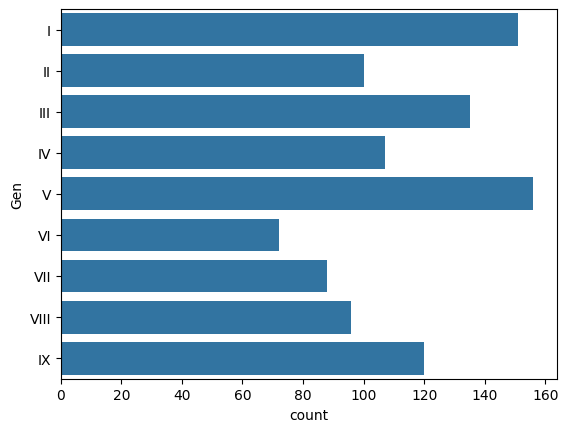

In [294]:
sns.countplot(df['Gen'])

In [298]:
stats_df = pd.json_normalize(df['Stats'])
evs_df = pd.json_normalize(df['EV Yield'])
type_effectiveness = pd.json_normalize(df['Type Effectiveness'])

In [307]:
df.set_index('Pokedex number').to_csv('../saves/PokemonComplete.csv')